# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../clustering_data.csv')
targets = ['mean_happiness_3clusters', 'mean_happiness_binary', 'mean_happiness']
df = df.set_index('Area Code')
df = df.replace([np.inf, -np.inf], np.nan)
df

,Year,mean_happiness,suicide_rates,crimes,population,population_density,unemployment,mean_income_support,n_is_claimants,house_sales,...,region_Wales,region_Scotland,region_NIreland,gardens_perc,income_support_rate,house_sales_pp,bankruptcy_pp,no_rainy_days,inflation,previous_period_happiness_change
Area Code,,,,,,,,,,,,,,,,,,,,,
E06000047,0,-0.06,-20.0,-7.740239,1267.0,0.569212,1.200000,-3.51,NaN,163.0,...,0,0,0,0.941,NaN,0.128650,-0.068666,15.7,-1.282878,NaN
E06000005,0,-0.12,-3.0,-12.366512,-81.0,-0.410177,0.801266,-3.00,-732.0,90.0,...,0,0,0,0.948,9.037037,-1.111111,0.123457,15.7,-1.282878,NaN
E06000001,0,-0.12,0.0,-7.812996,173.0,1.846072,-0.749596,-3.41,-1012.0,70.0,...,0,0,0,0.941,-5.849711,0.404624,-0.040462,15.7,-1.282878,NaN
E06000002,0,0.13,-1.0,-10.816688,358.0,6.644198,-0.083803,-3.57,-1699.0,174.0,...,0,0,0,0.946,-4.745810,0.486034,-0.067039,15.7,-1.282878,NaN
E06000057,0,0.20,1.0,-2.727673,211.0,0.042033,-0.200000,-2.76,-1445.0,-125.0,...,0,0,0,0.928,-6.848341,-0.592417,-0.208531,15.7,-1.282878,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N09000006,8,-0.02,NaN,NaN,-60.0,-0.020949,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,5.8,-0.748618,-0.23
N09000007,8,0.03,NaN,NaN,450.0,0.889705,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,5.8,-0.748618,-0.38
N09000008,8,-0.19,NaN,NaN,169.0,0.159552,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,5.8,-0.748618,-0.21


<class 'pandas.core.frame.DataFrame'>
Index: 3429 entries, E06000047 to N09000010
Columns: 427 entries, Year to previous_period_happiness_change
dtypes: float64(31), int64(396)
memory usage: 11.2+ MB


In [8]:
cols = [c for c in df.columns if 'Code_' not in c]
cols = [c for c in cols if 'region' not in c]
df_useful_features = df[cols]

In [16]:
for col in df_useful_features:
    print(col)
    print(df_useful_features[col].dtype)
    print(df_useful_features[col].isna().sum())
    print('\n')

Year
int64
0


mean_happiness
float64
29


suicide_rates
float64
486


crimes
float64
800


population
float64
99


population_density
float64
99


unemployment
float64
149


mean_income_support
float64
207


n_is_claimants
float64
216


house_sales
float64
486


bankruptcy
float64
423


processing
float64
989


productivity
float64
469


road_casualties
float64
1909


ofsted
float64
2412


infant_mortality
float64
974


childhood_tooth_decay
float64
1520


gp_access
float64
2671


dental_access
float64
3116


mean_happiness_3clusters
int64
0


mean_happiness_binary
int64
0


Core City
float64
180


Other City
float64
189


Large Town
float64
180


Medium Town
float64
180


Small Town
float64
180


Village or smaller
float64
180


gardens_perc
float64
99


income_support_rate
float64
221


house_sales_pp
float64
489


bankruptcy_pp
float64
489


no_rainy_days
float64
0


inflation
float64
0


previous_period_happiness_change
float64
405




nans, outliers, inconsistent numbers, plot histogram quartiles, check for long tails, correlation matrix, pps score, feature interactions (pandas profiling)

# Balanced Groups?

In [3]:
for target in targets[:2]:
    print(target + ': ')
    print(df[target].value_counts())
    print('\n')

mean_happiness_3clusters: 
 0    1286
 1    1088
-1    1055
Name: mean_happiness_3clusters, dtype: int64


mean_happiness_binary: 
 1    1716
-1    1713
Name: mean_happiness_binary, dtype: int64




# NaNs

<AxesSubplot:>

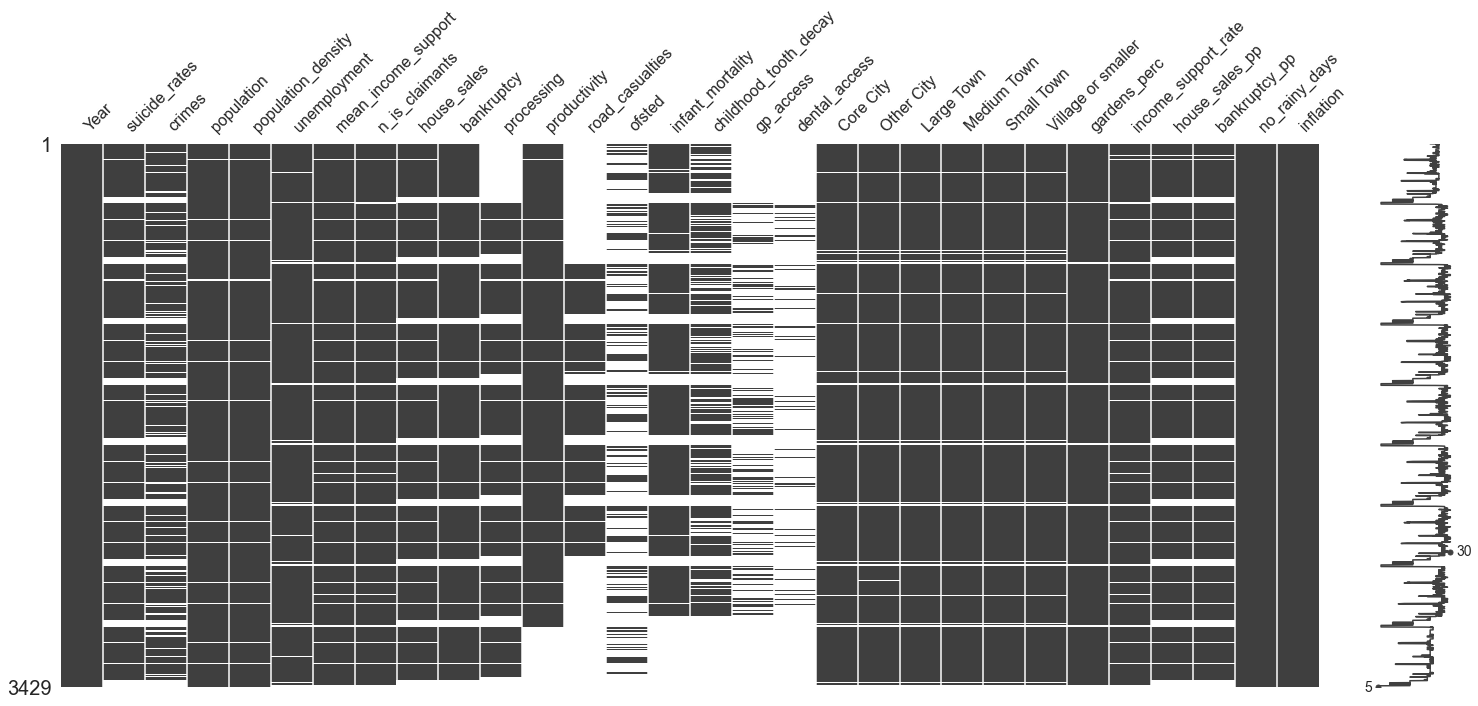

In [23]:
import missingno as msno

to_not_visualise = ['mean_happiness_3clusters', 'mean_happiness_binary', 'mean_happiness', 'previous_period_happiness_change']
visualise_nans_df = df_useful_features.drop(to_not_visualise, axis=1)
  
# Visualize missing values as a matrix
msno.matrix(visualise_nans_df)

# Long tails and outliers

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


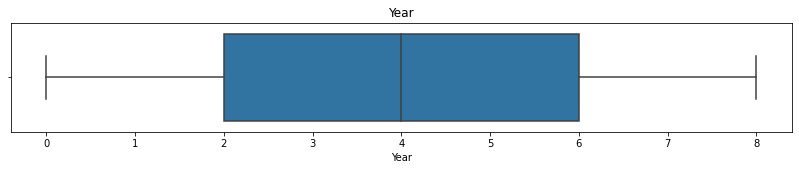

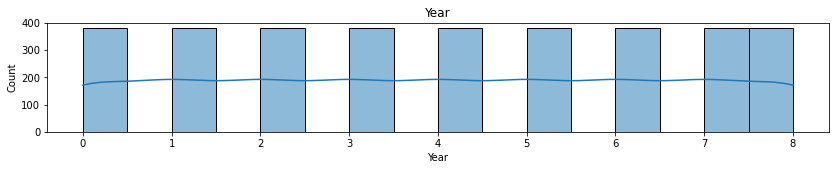

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


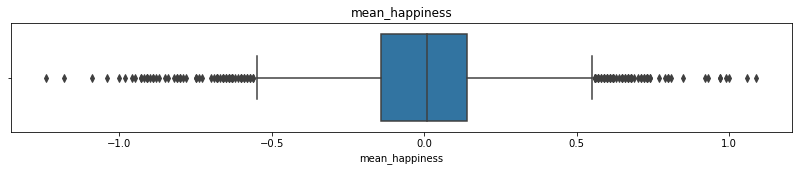

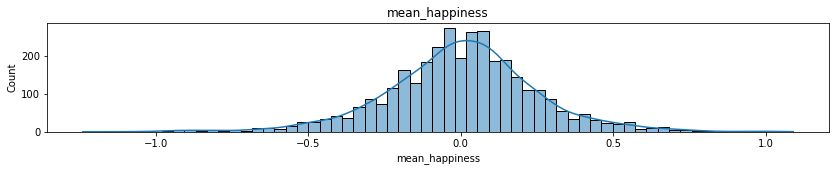

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


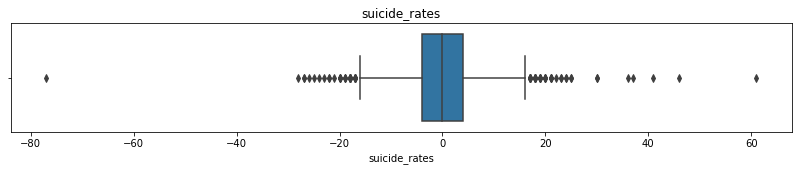

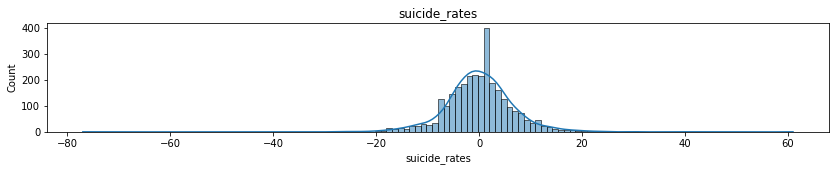

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


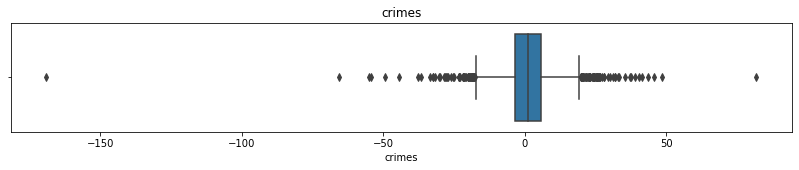

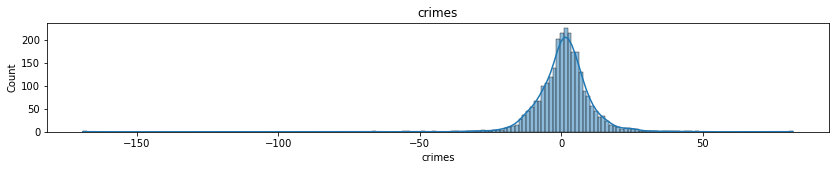

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


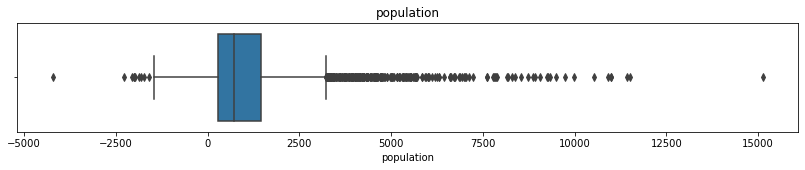

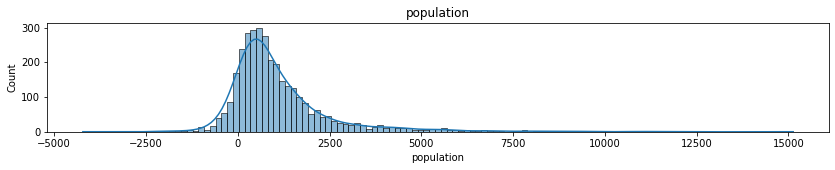

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


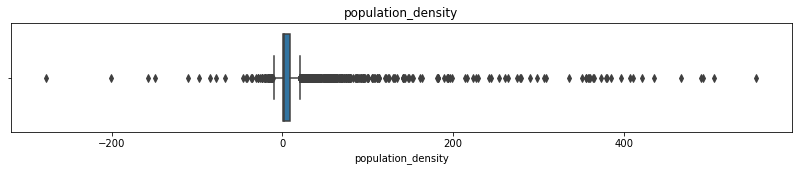

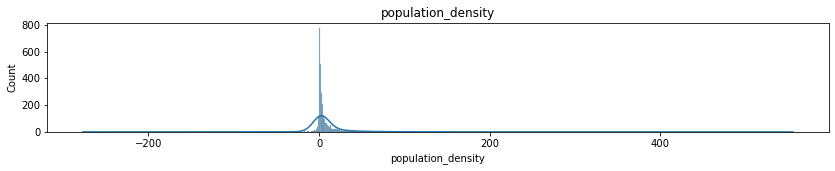

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


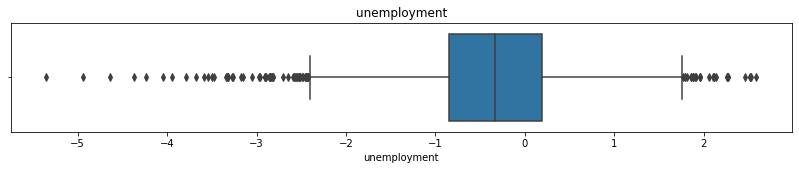

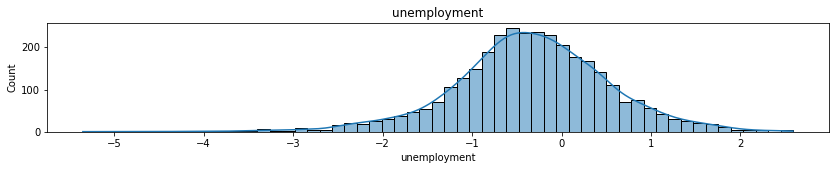

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


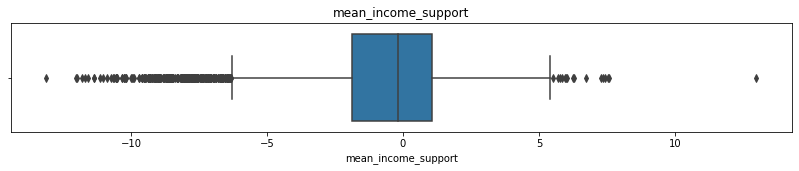

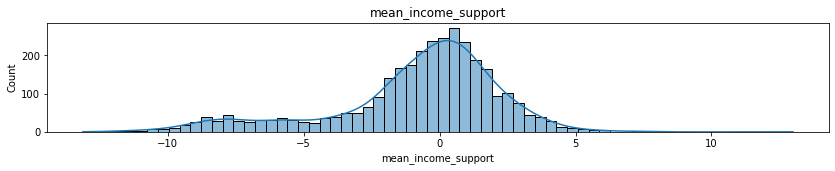

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


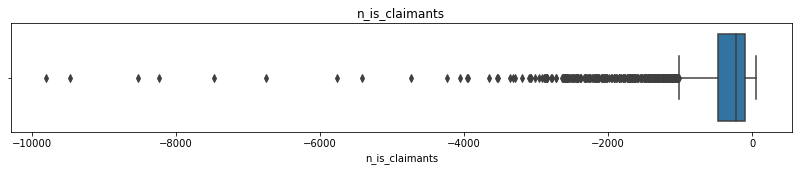

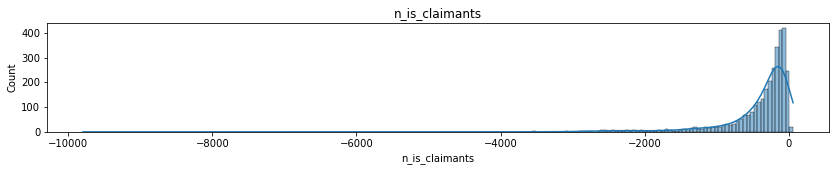

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


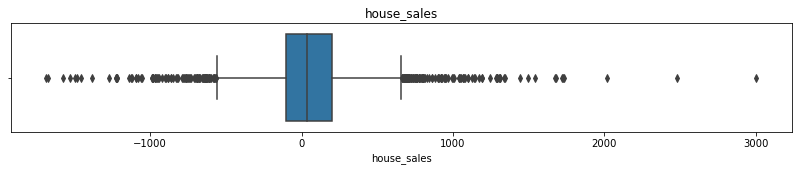

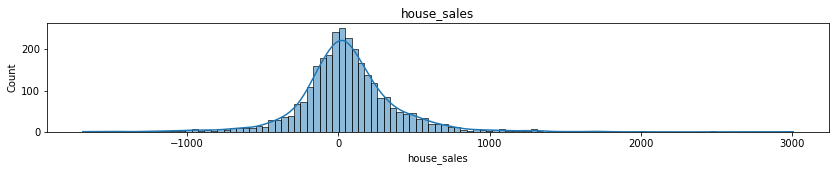

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


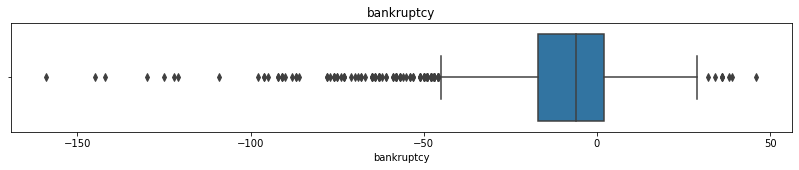

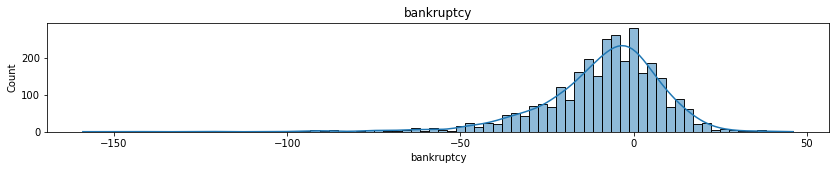

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


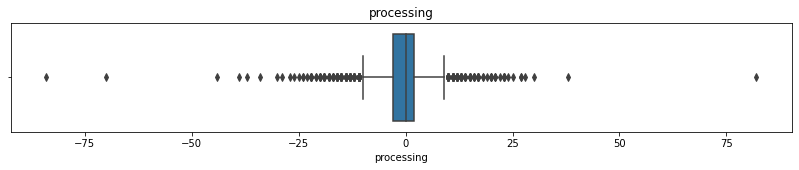

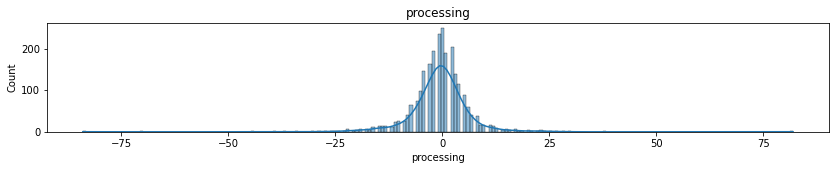

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


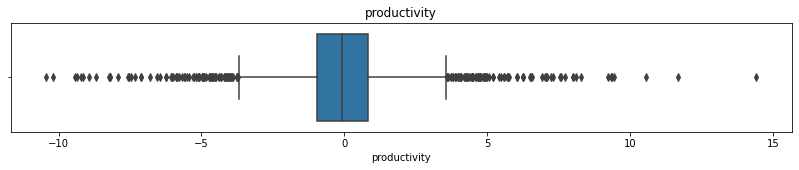

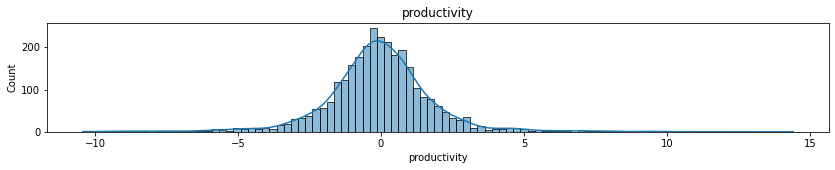

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


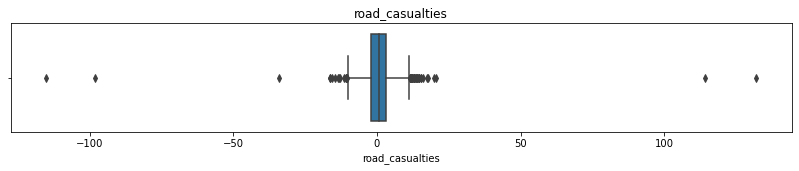

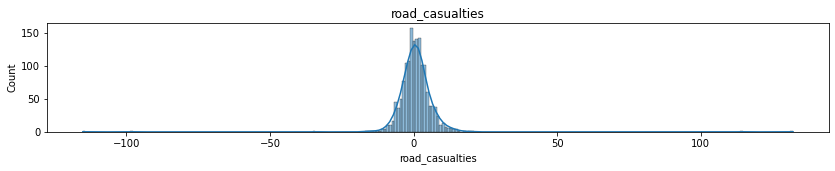

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


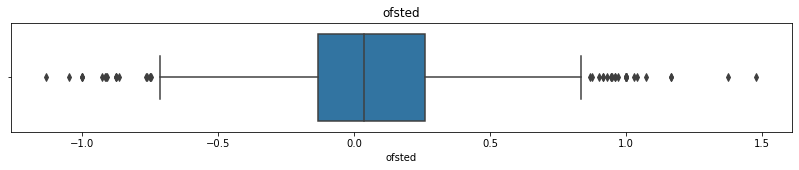

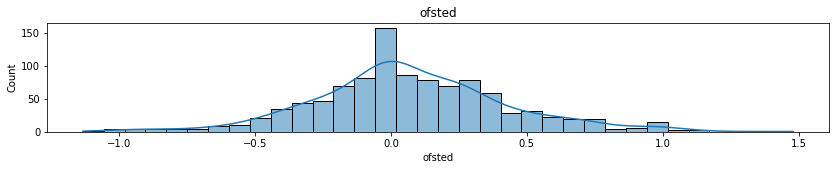

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


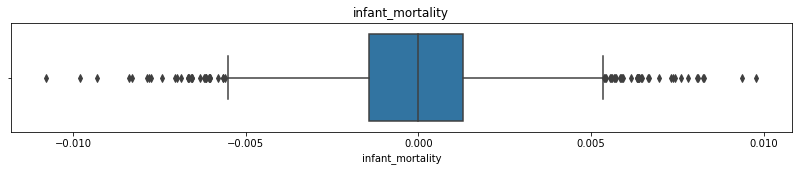

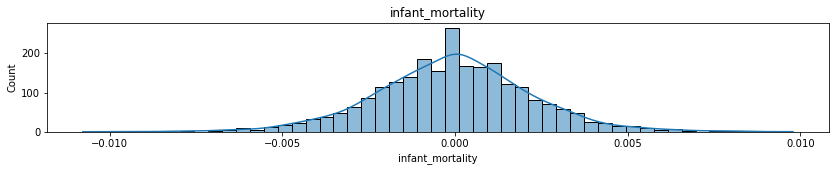

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


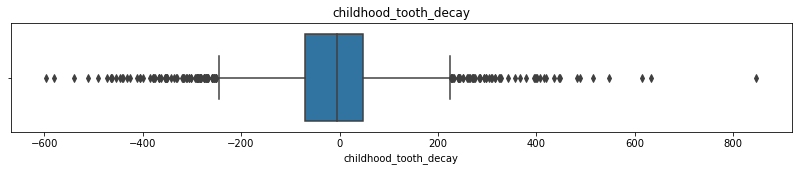

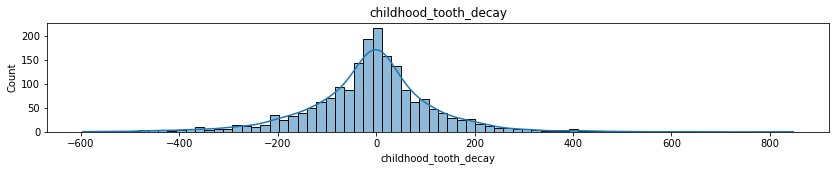

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


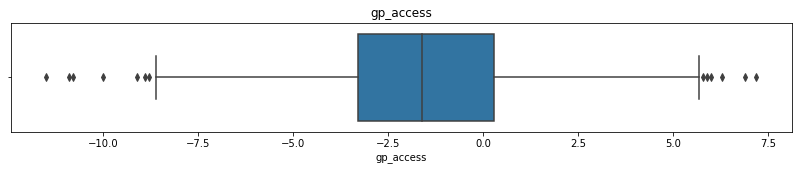

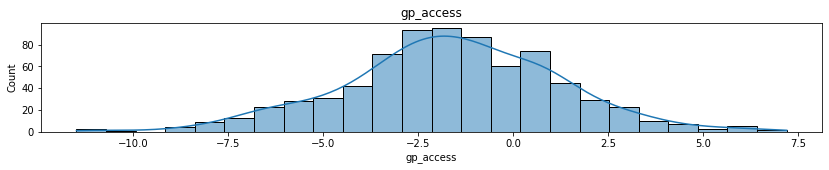

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


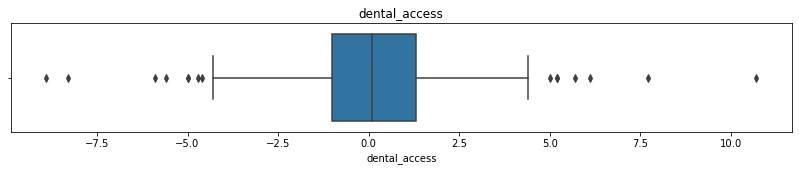

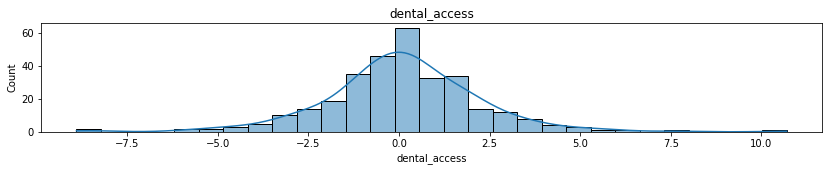

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


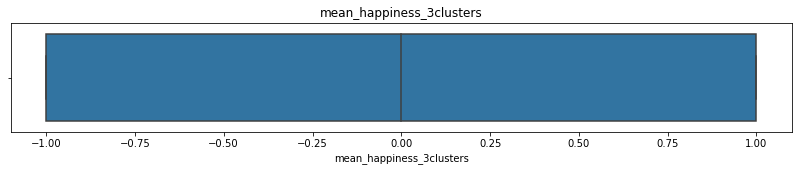

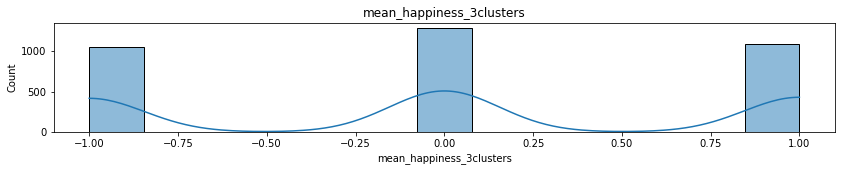

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


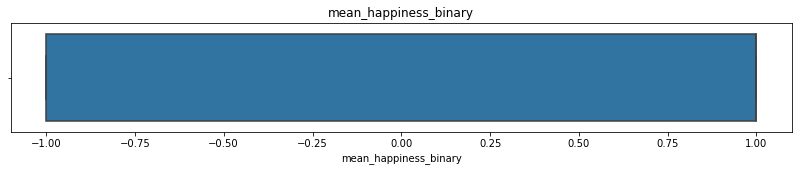

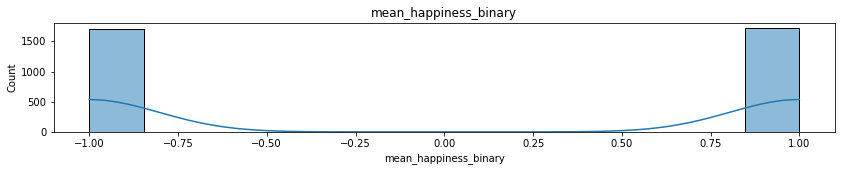

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


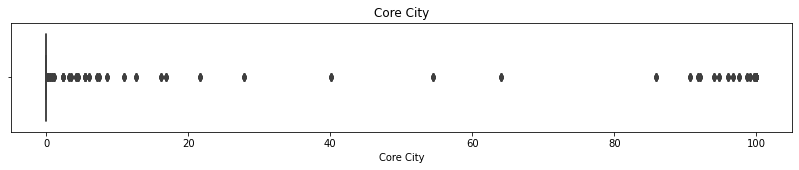

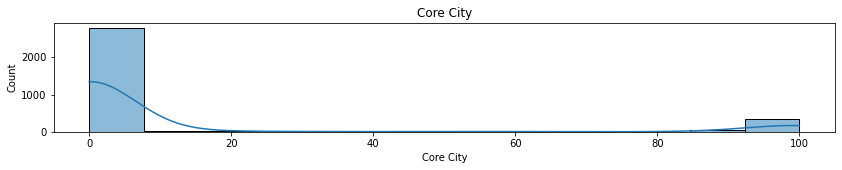

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


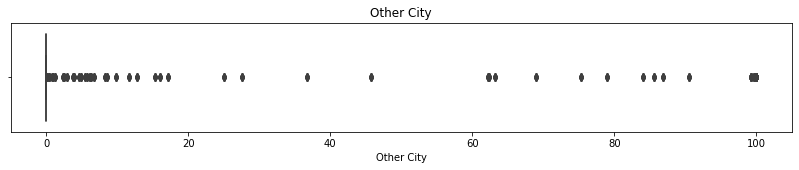

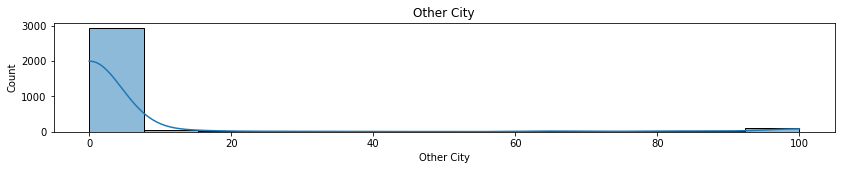

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


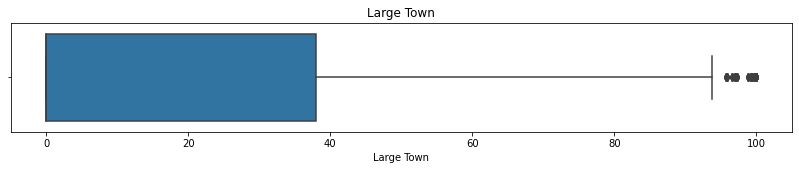

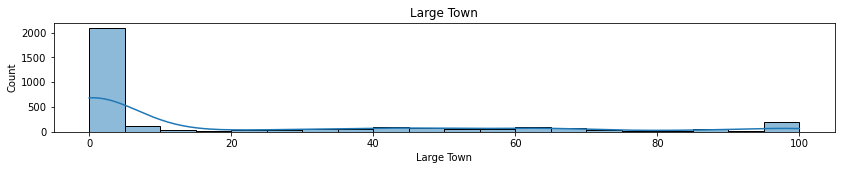

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


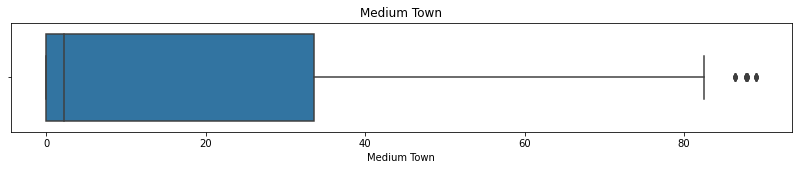

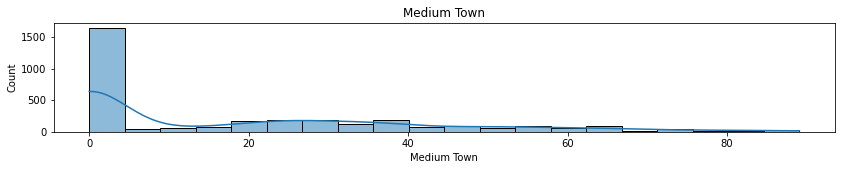

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


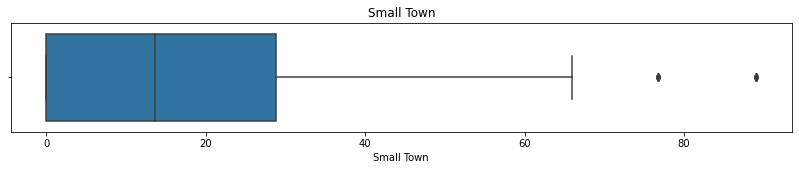

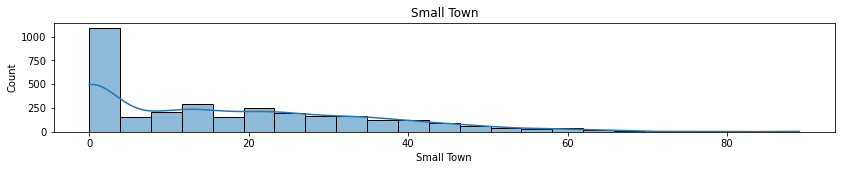

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


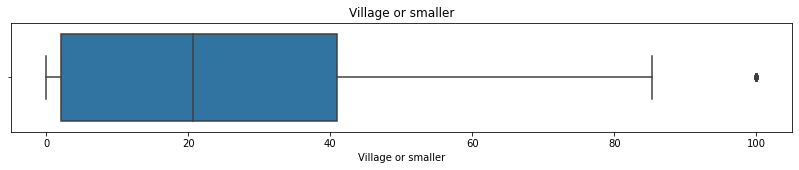

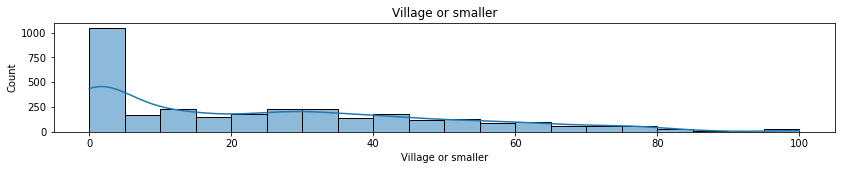

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


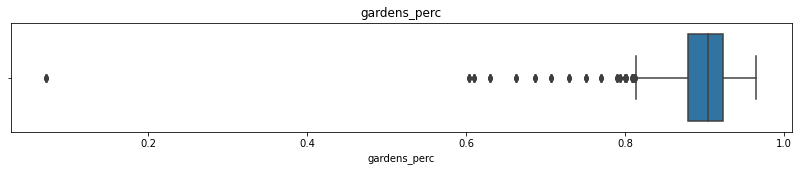

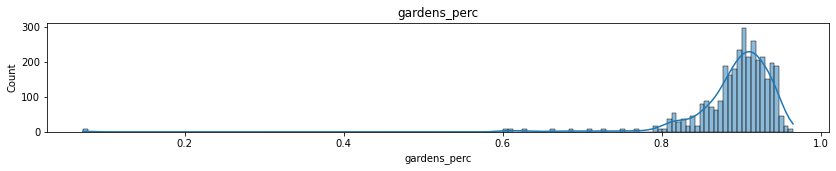

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


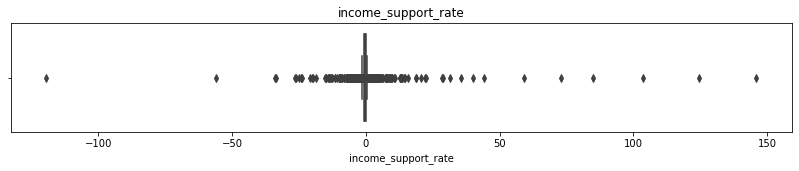

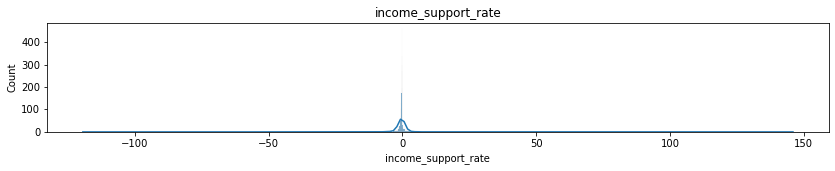

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


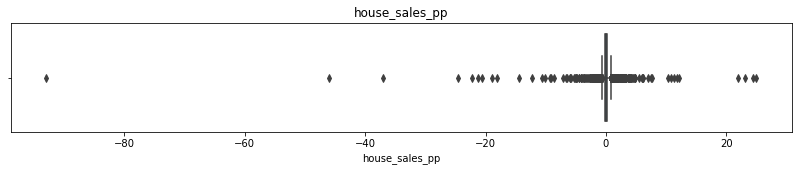

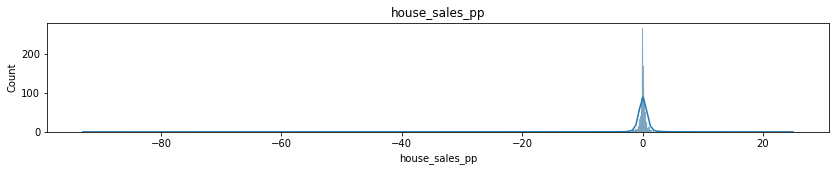

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


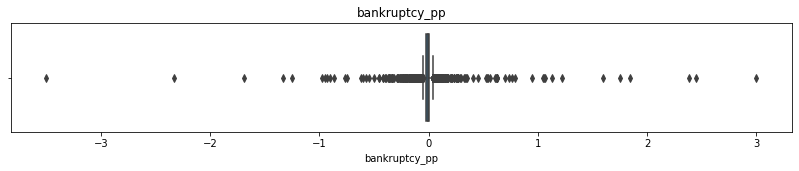

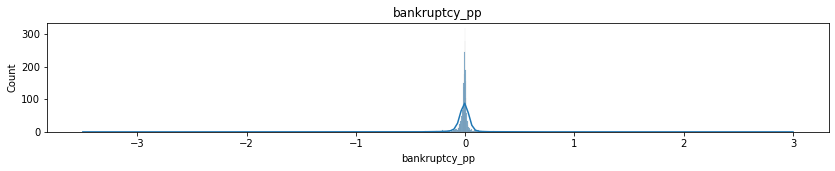

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


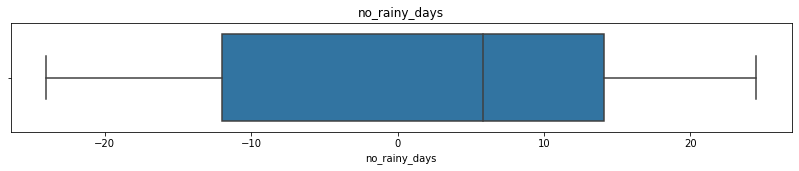

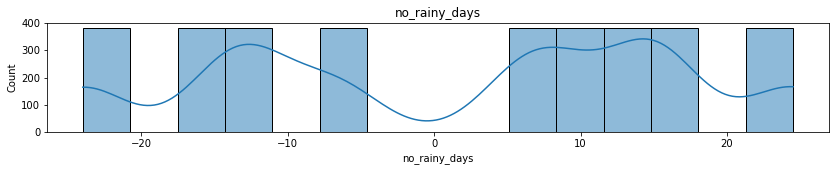

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


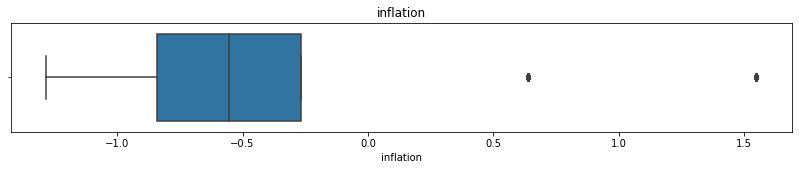

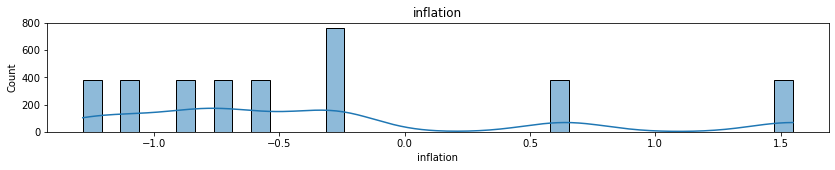

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


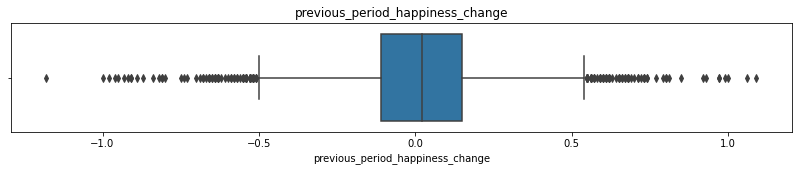

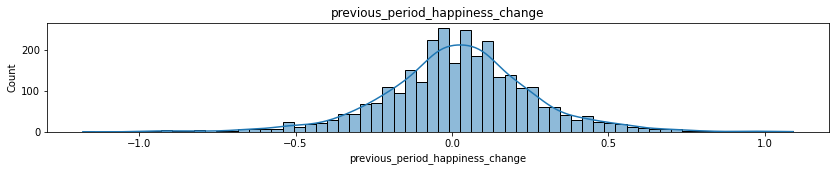

In [5]:
import seaborn as sns

df_boxplot = df_useful_features.reset_index().drop(columns=['Area Code'])

for i in df_boxplot.columns:
    col = df_boxplot[i].dropna()
    
    fig, ax = plt.subplots(figsize=(14, 2))
    sns.boxplot(col)
    ax.set_title(i)
    plt.show()
    
    fig2, ax2 = plt.subplots(figsize=(14, 2))
    sns.histplot(data=col,kde=True)
    ax2.set_title(i)
    plt.show()

# Correlation Matrix

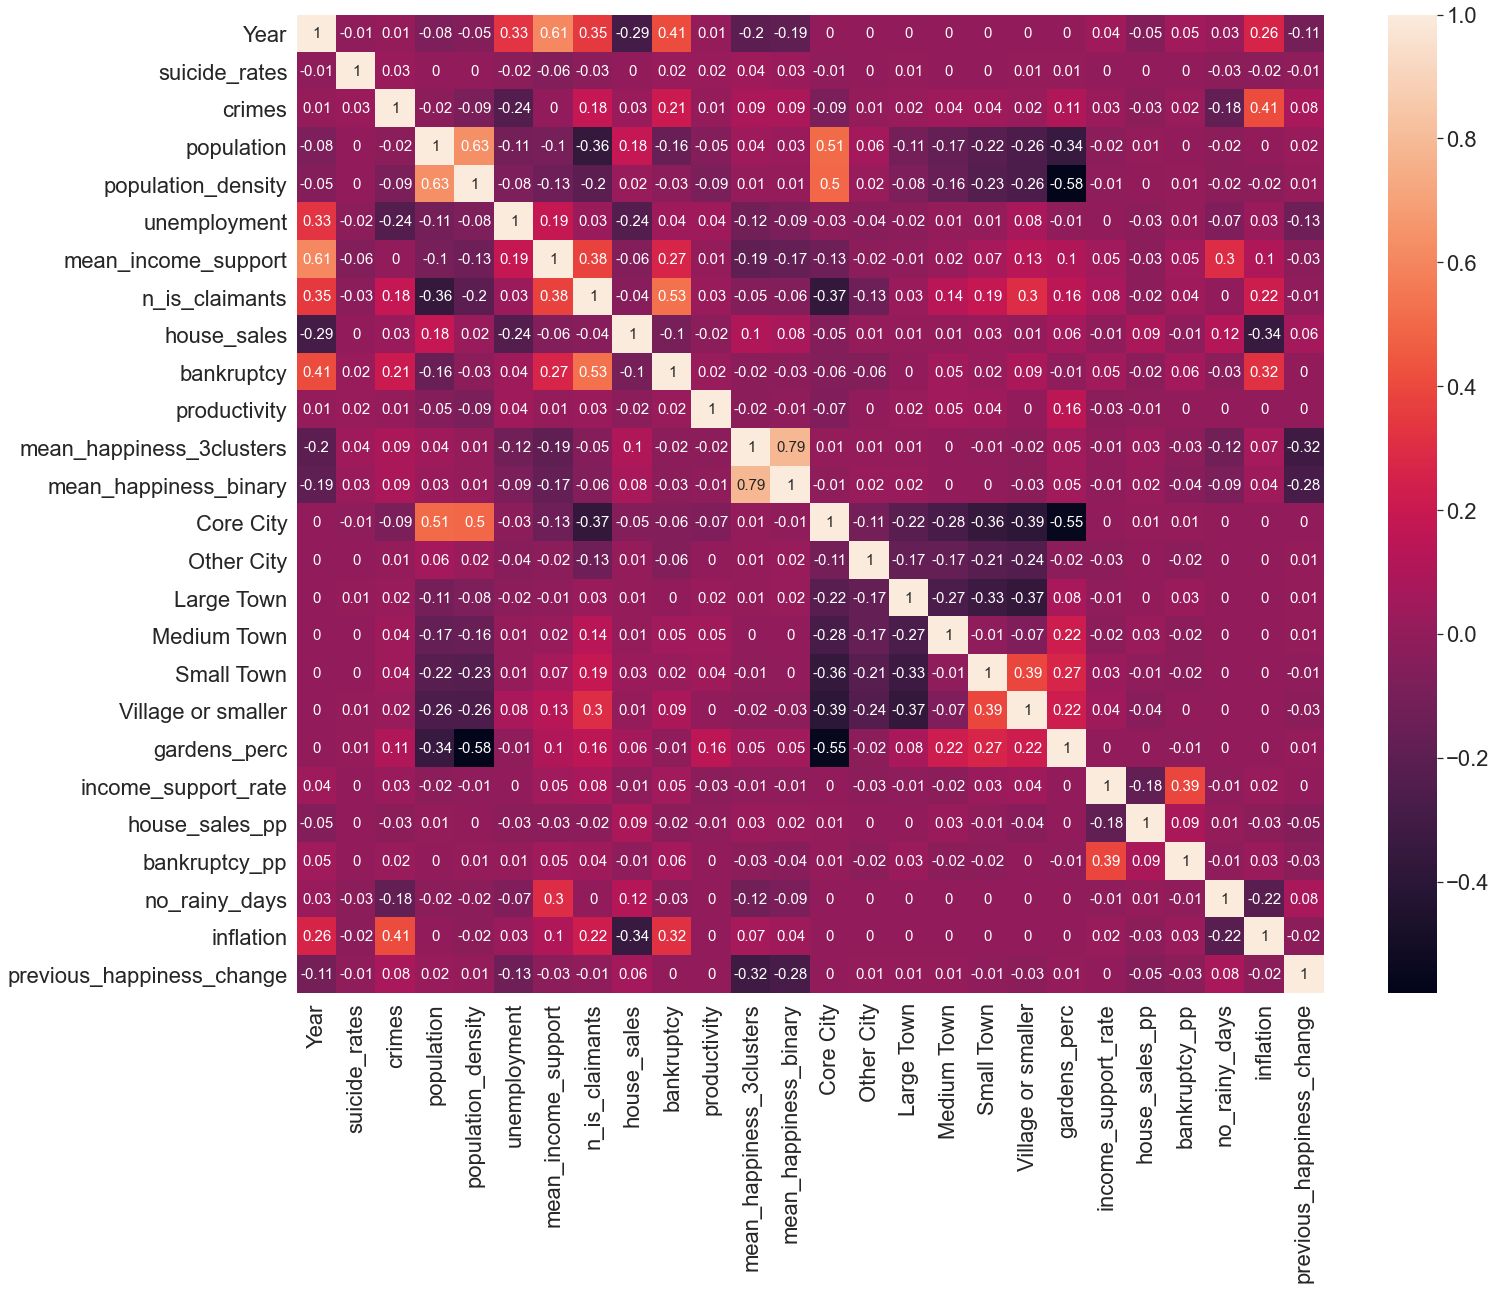

In [4]:
import seaborn as sns

sns.set(rc={'figure.figsize':(23,18)})

corr_df = df_useful_features.drop(['gp_access', 'infant_mortality', 'road_casualties', 'processing', 'dental_access', 'childhood_tooth_decay', 'ofsted', 'mean_happiness'], axis=1)
corr_df = corr_df.rename(columns = {'previous_period_happiness_change':'previous_happiness_change'})
corr = corr_df.corr().round(2)
corr = corr.replace(-0, 0)
sns.set(font_scale = 2)

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, annot_kws={"size": 15})
plt.show()